In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Wczytanie danych z pliku txt z separatorem \t i IEDA

In [2]:
body_fat_df = pd.read_csv('chhp.txt', sep="\t")

In [3]:
body_fat_df.head()

,Density,Pct.BF,Age,Weight,Height,Neck,Chest,Abdomen,Waist,Hip,Thigh,Knee,Ankle,Bicep,Forearm,Wrist
0,1.0708,12.3,23,154.25,67.75,36.2,93.1,85.2,33.543307,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,1.0853,6.1,22,173.25,72.25,38.5,93.6,83.0,32.677165,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,1.0414,25.3,22,154.00,66.25,34.0,95.8,87.9,34.606299,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,1.0751,10.4,26,184.75,72.25,37.4,101.8,86.4,34.015748,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,1.0340,28.7,24,184.25,71.25,34.4,97.3,100.0,39.370079,101.9,63.2,42.2,24.0,32.2,27.7,17.7


In [4]:
body_fat_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 16 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Density  250 non-null    float64
 1   Pct.BF   250 non-null    float64
 2   Age      250 non-null    int64  
 3   Weight   250 non-null    float64
 4   Height   250 non-null    float64
 5   Neck     250 non-null    float64
 6   Chest    250 non-null    float64
 7   Abdomen  250 non-null    float64
 8   Waist    250 non-null    float64
 9   Hip      250 non-null    float64
 10  Thigh    250 non-null    float64
 11  Knee     250 non-null    float64
 12  Ankle    250 non-null    float64
 13  Bicep    250 non-null    float64
 14  Forearm  250 non-null    float64
 15  Wrist    250 non-null    float64
dtypes: float64(15), int64(1)
memory usage: 31.4 KB


In [5]:
body_fat_df.describe()

,Density,Pct.BF,Age,Weight,Height,Neck,Chest,Abdomen,Waist,Hip,Thigh,Knee,Ankle,Bicep,Forearm,Wrist
count,250.000000,250.0000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000
mean,1.055838,19.0316,44.884000,178.083200,70.303000,37.944800,100.662000,92.286800,36.333386,99.651200,59.249600,38.532800,23.074000,32.217200,28.662400,18.220400
std,0.018875,8.2940,12.652227,27.035488,2.616644,2.290454,8.153765,10.207444,4.018679,6.443634,4.912309,2.314136,1.650436,2.922449,2.028677,0.913983
min,0.995000,0.0000,22.000000,118.500000,64.000000,31.100000,79.300000,69.400000,27.322835,85.000000,47.200000,33.000000,19.100000,24.800000,21.000000,15.800000
25%,1.041650,12.4250,35.250000,158.500000,68.250000,36.400000,94.250000,84.525000,33.277559,95.500000,56.000000,36.925000,22.000000,30.200000,27.300000,17.600000
50%,1.054950,19.2000,43.000000,176.125000,70.000000,38.000000,99.600000,90.900000,35.787402,99.300000,58.950000,38.450000,22.800000,32.000000,28.700000,18.300000
75%,1.070400,25.2000,54.000000,196.750000,72.250000,39.400000,105.300000,99.175000,39.045276,103.175000,62.250000,39.875000,24.000000,34.300000,30.000000,18.800000
max,1.108900,47.5000,81.000000,262.750000,77.750000,43.900000,128.300000,126.200000,49.685039,125.600000,74.400000,46.000000,33.900000,39.100000,34.900000,21.400000


In [6]:
body_fat_df.isna().sum()

,0
Density,0
Pct.BF,0
Age,0
Weight,0
Height,0
Neck,0
Chest,0
Abdomen,0
Waist,0
Hip,0


Jak widać, nie ma brakujących danych :)

# EDA

**1. Sprawdzenie korelacji między zmiennymi** - pierwsza metoda eliminacji zmiennych

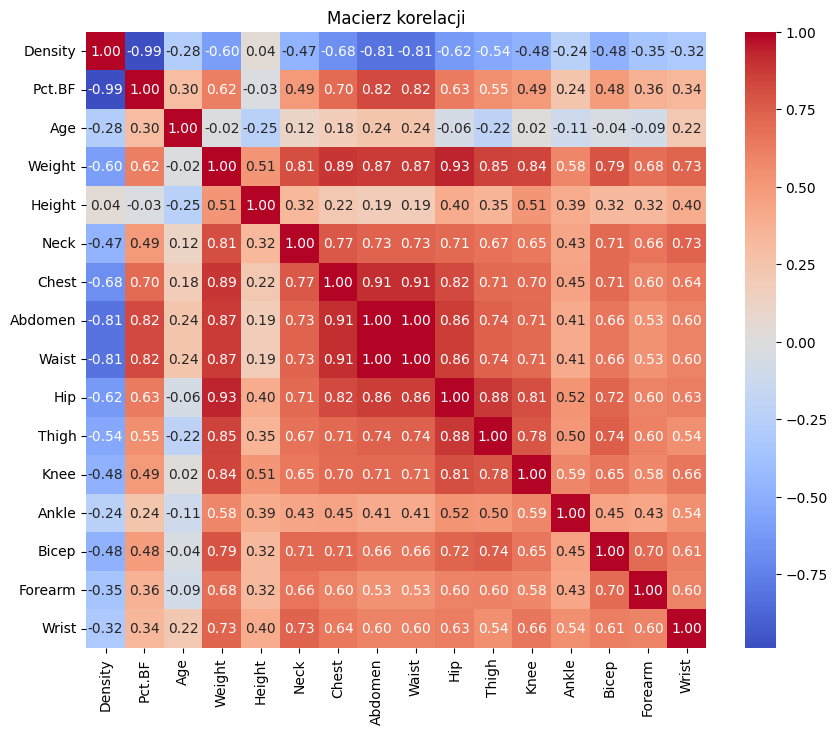

In [7]:
plt.figure(figsize=(10,8))
sns.heatmap(body_fat_df.corr(), annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Macierz korelacji')
plt.show()

**Obserwacje:** Jak widać na powyższej wizualizacji macierzy korelacji, sugerowana jest silna korelacja między zmienną zależną - poziomem tkanki tłuszczowej a zmiennymi objaśniającymi - brzuchem czy talią. Ponadto, macierz korelacji sugeruje silną korelację między predyktorami o największej korelacji ze zmienną zależną - brzuch i talia, po czym można wnioskować, że eliminacja wsteczna wyeliminuje któryś z nich ze względu na to, że de facto mierzą to samo a chcemy uniknąć wieloliniowości i redundantnych danych (multikolinearność). Warto też zauważyć, że między procentem BF a gęstością występuje niemalże idealna korelacja ujemna, czyli im większy poziom tkanki tłuszczowej, tym mniejsza gęstość.

**2. Sprawdzenie na wykresach (liniowość)**

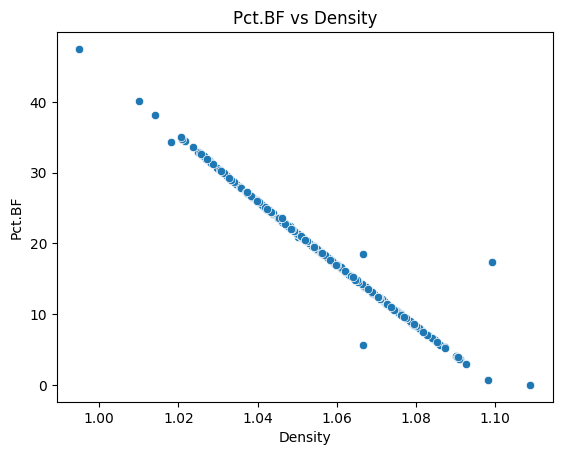

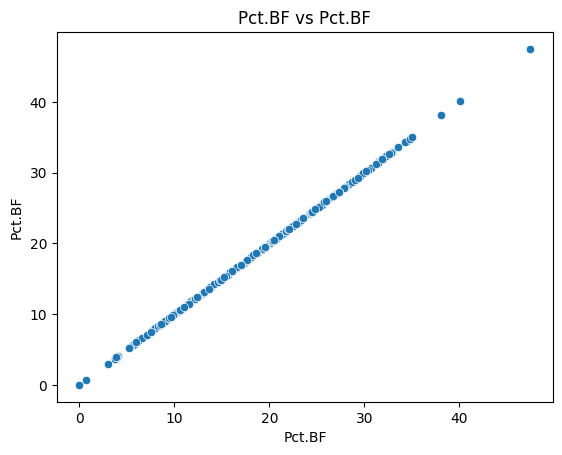

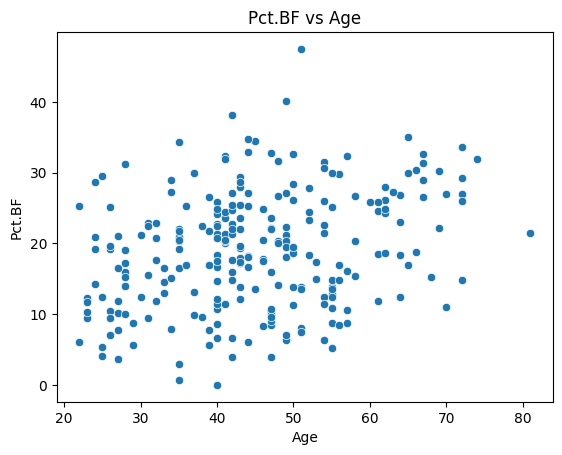

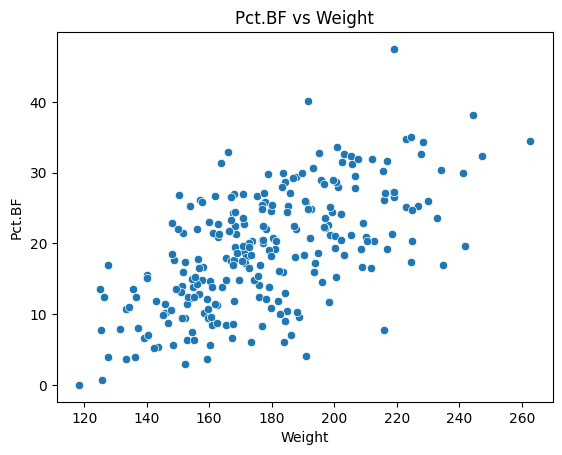

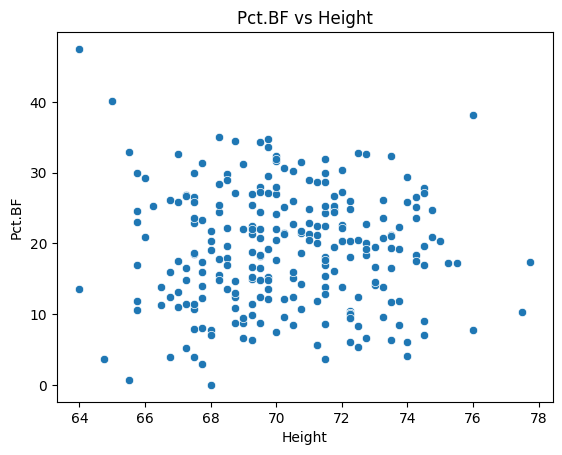

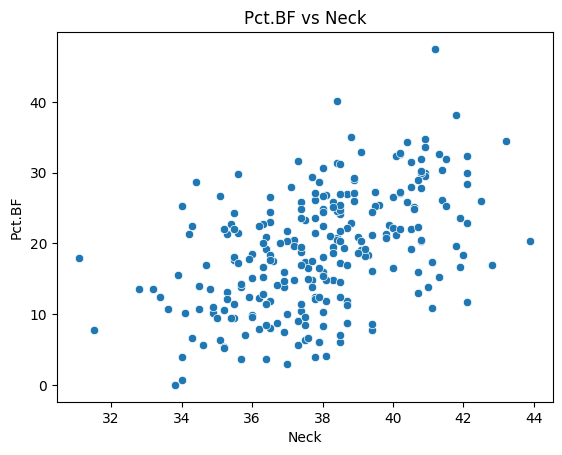

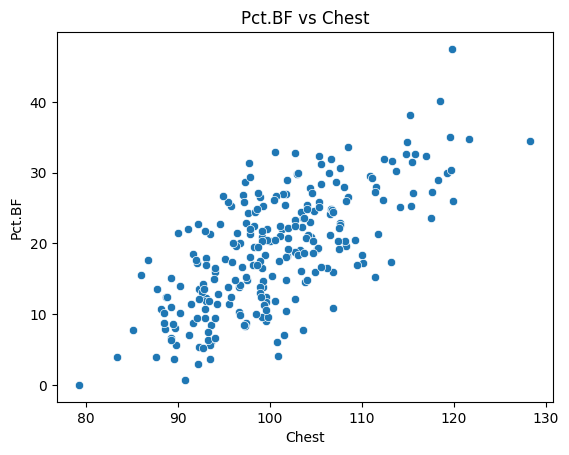

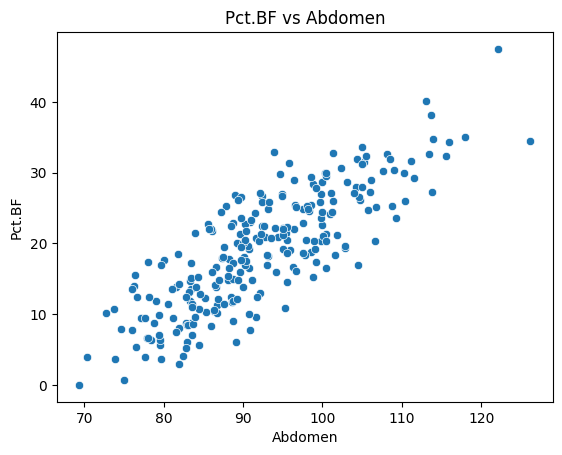

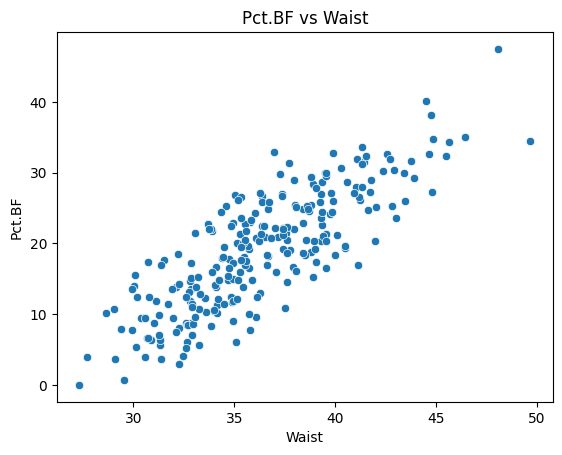

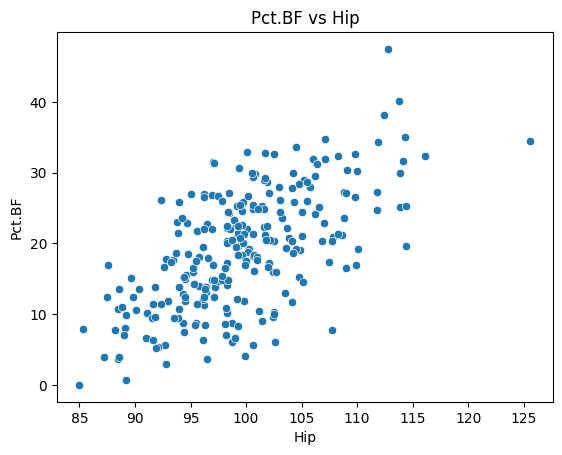

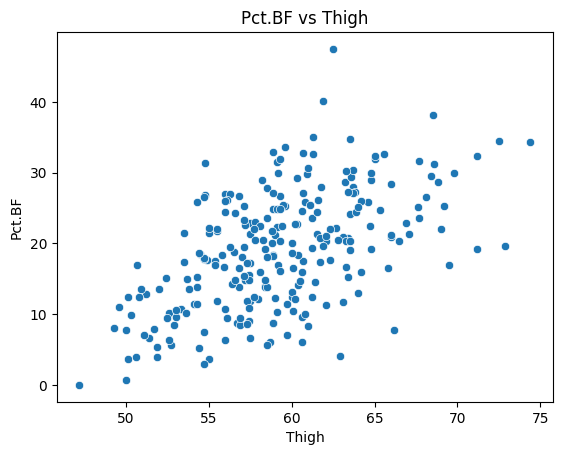

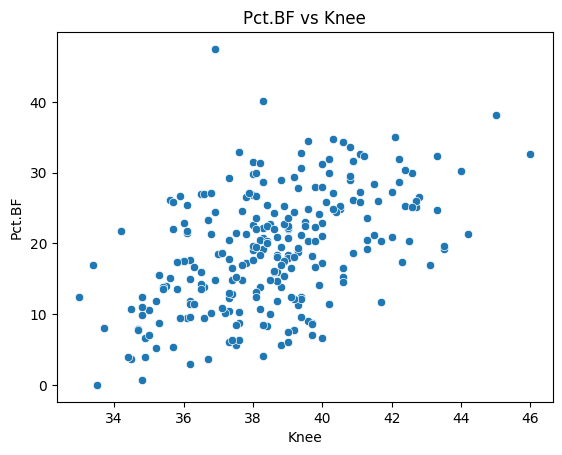

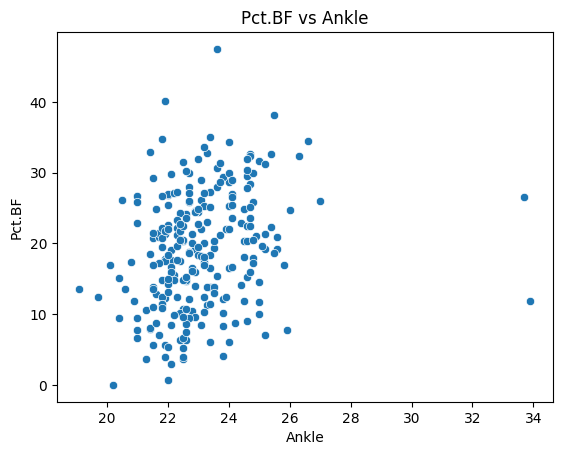

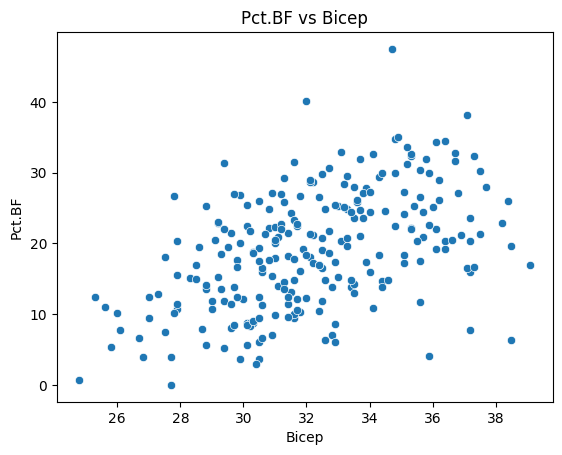

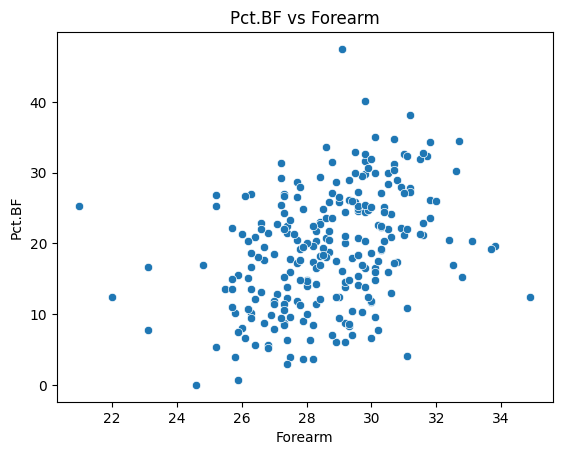

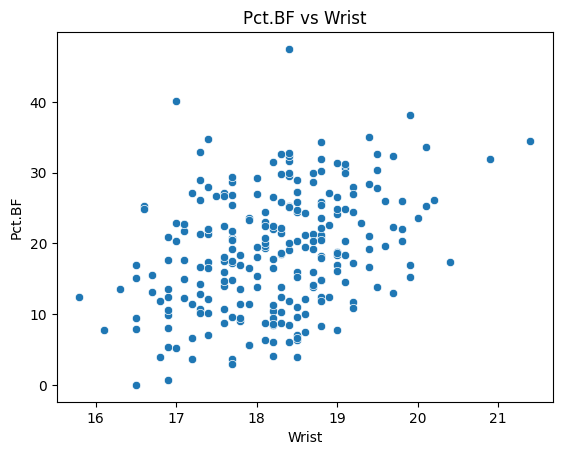

In [8]:
for col in body_fat_df.columns:
    plt.figure()
    sns.scatterplot(x=body_fat_df[col], y=body_fat_df['Pct.BF'])
    plt.title(f'Pct.BF vs {col}')
    plt.show()


**Obserwacje:** Analiza wykresów rozrzutu między zmienną zależną (bodyfat %) a zmiennymi objaśniającymi nie wykazała konkretnego wzorca kształtu związków między nimi. Widać jedynie silną odwrotną proporcjonalność gęstości i BF, co świadczy też, po wykresie o zależności liniowej. Wykresy Abdomen vs BF i Waist vs BF sugerują, że będzie to liniowa relacja.

# Model z Abdomen vs BF
Z analizy macierzy korelacji wynika występowanie silnej multikolinearności między zmiennymi Abdomen i Waist (korelacja = 1.0). Aby uniknąć niestabilności modelu, zdecydowałem się nie budować modelu uwzgledniającego te 2 zmienne jednocześnie

# Model z Abdomen vs BF


                            OLS Regression Results                            
Dep. Variable:                 Pct.BF   R-squared:                       0.692
Model:                            OLS   Adj. R-squared:                  0.691
Method:                 Least Squares   F-statistic:                     445.1
Date:                Sat, 20 Dec 2025   Prob (F-statistic):           1.53e-52
Time:                        20:41:39   Log-Likelihood:                -586.22
No. Observations:                 200   AIC:                             1176.
Df Residuals:                     198   BIC:                             1183.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -42.8748      2.933    -14.618      0.0

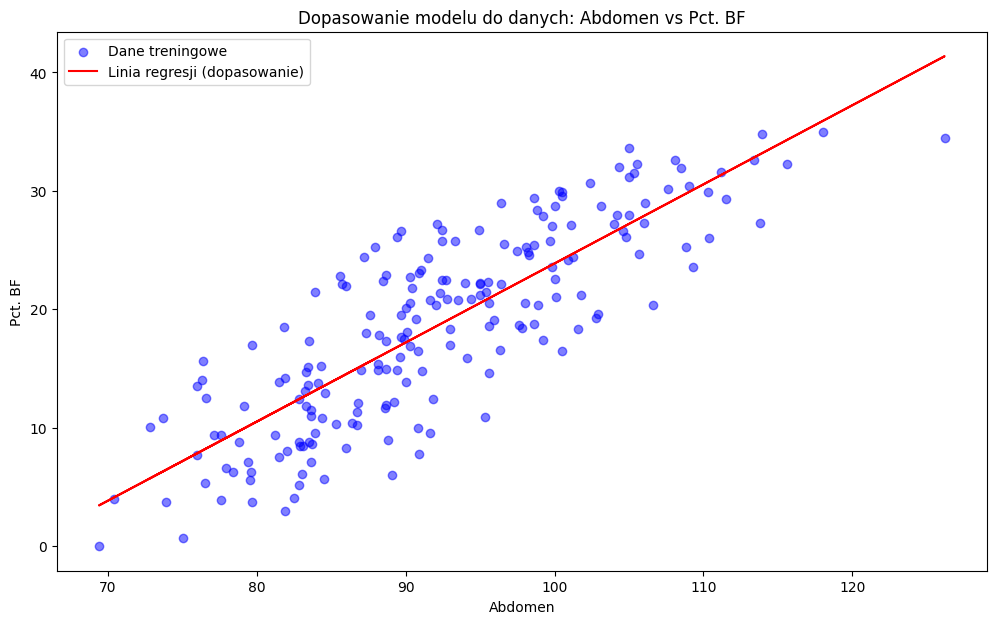

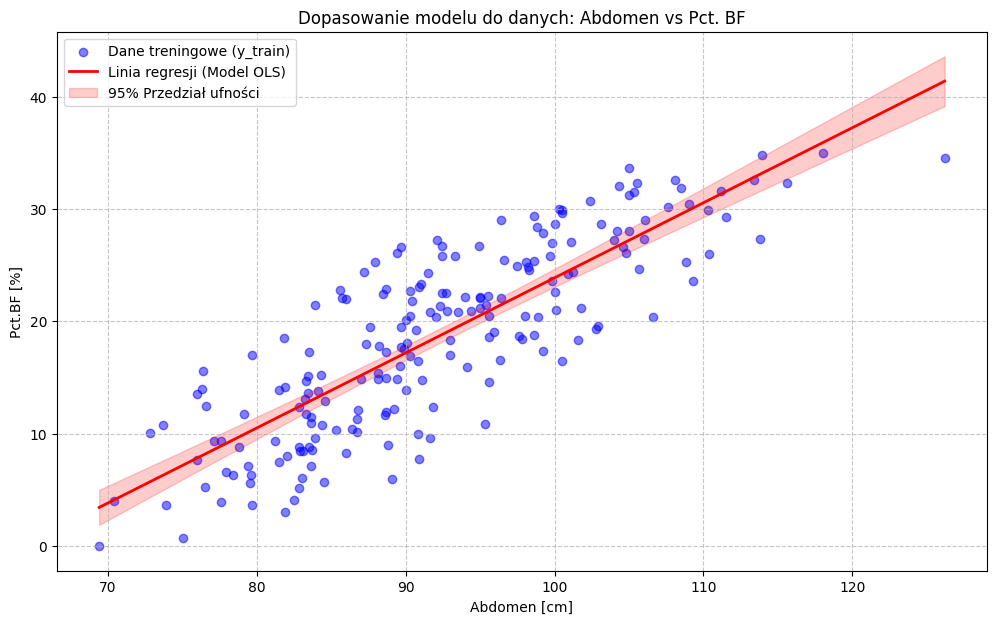

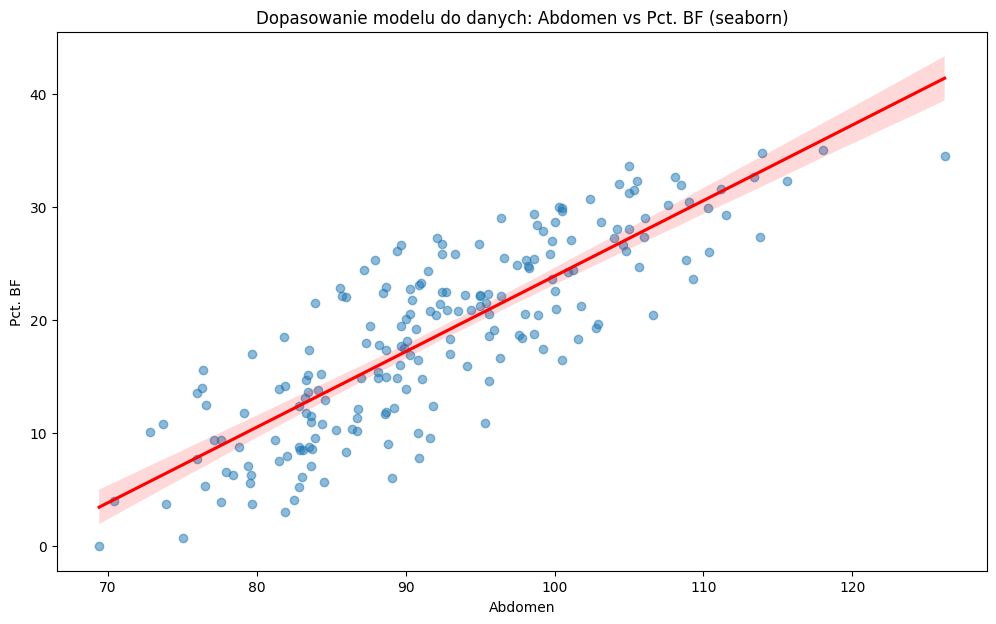

In [70]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, root_mean_squared_error
import statsmodels.api as sm

X = body_fat_df['Abdomen']
y = body_fat_df['Pct.BF']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train, X_test = sm.add_constant(X_train), sm.add_constant(X_test)

model = sm.OLS(y_train, X_train).fit()
print(model.summary())

y_pred = model.predict(X_test)

me = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)

print(f"ME: {me}")
print(f"MAE: {mae}")
print(f"RMSE: {rmse}")

plt.figure(figsize=(12, 7))
plt.scatter(X_train['Abdomen'], y_train, alpha=0.5, label='Dane treningowe', color='blue')
plt.plot(X_train['Abdomen'], model.predict(X_train), color='red', label='Linia regresji (dopasowanie)')
plt.title('Dopasowanie modelu do danych: Abdomen vs Pct. BF')
plt.xlabel('Abdomen')
plt.ylabel('Pct. BF')
plt.legend()
plt.show()


X_train_sorted = X_train.sort_values(by='Abdomen')
prediction_results = model.get_prediction(X_train_sorted)
summary_frame = prediction_results.summary_frame(alpha=0.05) # 95%

plt.figure(figsize=(12, 7))
plt.scatter(X_train['Abdomen'], y_train, color='blue', alpha=0.5, label='Dane treningowe (y_train)')
plt.plot(X_train_sorted['Abdomen'], summary_frame['mean'], color='red', linewidth=2, label='Linia regresji (Model OLS)')
plt.fill_between(X_train_sorted['Abdomen'],
                 summary_frame['mean_ci_lower'],
                 summary_frame['mean_ci_upper'],
                 color='red', alpha=0.2, label='95% Przedział ufności')

plt.title('Dopasowanie modelu do danych: Abdomen vs Pct. BF')
plt.xlabel('Abdomen [cm]')
plt.ylabel('Pct.BF [%]')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

plt.figure(figsize=(12, 7))
sns.regplot(x=X_train['Abdomen'], y=y_train, scatter_kws={'alpha': 0.5, }, line_kws={'color': 'red'})
plt.title('Dopasowanie modelu do danych: Abdomen vs Pct. BF (seaborn)')
plt.xlabel('Abdomen')
plt.ylabel('Pct. BF')
plt.show()

**Wykres dopasowania modelu do danych treningowych** *wskazuje silną, dodatnią korelację liniową między obwodem brzucha a procentem tkanki tłuszczowej. Rozrzut niektórych wartości rzeczywistych poza przedział ufności może świadczyć o tym, że istnieją inne czynniki, nie tylko Abdomen, któe wpływają na poziom tkanki tłuszczowej.*

**Tabela rzeczywista wartość vs predykcja**

In [71]:
from tabulate import tabulate
import scipy.stats as stats

print(tabulate(zip(X_test['Abdomen'], y_test, y_pred), headers=['Abdomen', 'Obserwacja Pct. BF', 'Prognoza Pct. BF']))
prediction_obj = model.get_prediction(X_test)
summary_table = prediction_obj.summary_frame(alpha=0.05)

df = model.df_resid  # stopnie swobody
t_crit = stats.t.ppf(1 - 0.05/2, df)

results_df = pd.DataFrame({
    'Abdomen': X_test['Abdomen'],
    'Obserwacja Pct. BF': y_test,
    'Prognoza Pct. BF': summary_table['mean'].values,
    'Bład standardowy': summary_table['mean_se'].values,
    'Przedział 95% (dolny)': summary_table['obs_ci_lower'].values, # przedzial predykcji
    'Przedział 95% (górny)': summary_table['obs_ci_upper'].values # przedzial predykcji
})

results_df.reset_index(inplace=True, drop=True)

print(f"\n\nWartość t-Studenta dla 95% przedziału: {t_crit:.3f}")
results_df

  Abdomen    Obserwacja Pct. BF    Prognoza Pct. BF
---------  --------------------  ------------------
     86.6                  16.7            14.9337
     90.4                  17.5            17.4703
     96.7                  16.1            21.6758
    101.3                  32.8            24.7465
    100.4                  20.3            24.1457
    113.1                  40.1            32.6234
     99.1                  19.2            23.2779
    101.3                  26              24.7465
     86.1                  16              14.5999
     86.5                  14.1            14.8669
     88.2                  16.5            16.0017
     99.8                  20.4            23.7452
     74.6                   7.9             6.92327
     86.6                  13.8            14.9337
     89                    26.8            16.5358
     81.1                  13.6            11.2623
     90.6                  19.7            17.6038
    113.7                  3

,Abdomen,Obserwacja Pct. BF,Prognoza Pct. BF,Bład standardowy,Przedział 95% (dolny),Przedział 95% (górny)
0,86.6,16.7,14.933693,0.366892,5.913542,23.953845
1,90.4,17.5,17.470327,0.327034,8.456139,26.484514
2,96.7,16.1,21.675798,0.353272,12.657761,30.693834
3,101.3,32.8,24.746459,0.433628,15.714799,33.778119
4,100.4,20.3,24.145677,0.415124,15.117399,33.173956
5,113.1,40.1,32.623372,0.737554,23.515402,41.731343
6,99.1,19.2,23.277882,0.390520,14.253873,32.301890
7,101.3,26.0,24.746459,0.433628,15.714799,33.778119
8,86.1,16.0,14.599926,0.374702,5.578526,23.621326
9,86.5,14.1,14.866940,0.368413,5.846548,23.887332


**Obserwacje:** Model całkiem dobrze dopasowuje się do danych treningowych (R^2). Obliczone ME, MAE, RMSE sugerują, że zdolność modelu do predykcji opartego na tej jednej zmiennej jest dobra. Jeśli chodzi o prognozę, analiza i zestawienie danych rzeczywistych z prognozami sugeruje, że uwzględnienie tylko jednej zmiennej objaśniającej może być niewystarczające. Mimo poprawnej weryfikacji statystycznej modelu prostego, analiza przedziałów predykcji wykazała jego istotne ograniczenia. Dla obserwacji o niskich wartościach obwodu brzucha, dolna granica przedziału predykcji przyjmuje wartości ujemne, co jest biologicznie niemożliwe, warto zauważyć też relatywnie szeroki przedział dla poszczególnych rekordów, co może w praktyce nie mieć żadnej wartości biznesowej. Świadczy to o tym, że pojedyncza zmienna objaśniająca może nie być wystarczająca do precyzyjnego opisania tak złożonego parametru, jakim jest zawartość tkanki tłuszczowej.

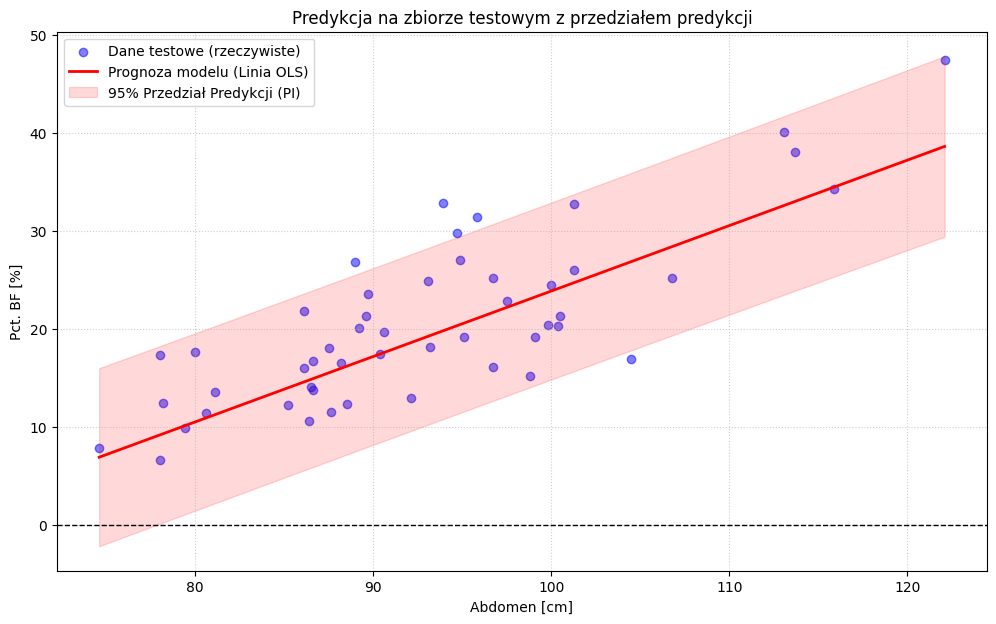

In [72]:
plot_df = results_df.sort_values('Abdomen')

plt.figure(figsize=(12, 7))
plt.scatter(results_df['Abdomen'], results_df['Obserwacja Pct. BF'],
            color='blue', alpha=0.5, label='Dane testowe (rzeczywiste)')
plt.plot(plot_df['Abdomen'], plot_df['Prognoza Pct. BF'],
         color='red', lw=2, label='Prognoza modelu (Linia OLS)')
plt.fill_between(plot_df['Abdomen'],
                 plot_df['Przedział 95% (dolny)'],
                 plot_df['Przedział 95% (górny)'],
                 color='red', alpha=0.15, label='95% Przedział Predykcji (PI)')

plt.axhline(0, color='black', linewidth=1, linestyle='--')
plt.title('Predykcja na zbiorze testowym z przedziałem predykcji')
plt.xlabel('Abdomen [cm]')
plt.ylabel('Pct. BF [%]')
plt.legend()
plt.grid(True, linestyle=':', alpha=0.6)
plt.show()

# Model z Waist vs BF

                            OLS Regression Results                            
Dep. Variable:                 Pct.BF   R-squared:                       0.704
Model:                            OLS   Adj. R-squared:                  0.702
Method:                 Least Squares   F-statistic:                     469.9
Date:                Sat, 20 Dec 2025   Prob (F-statistic):           3.59e-54
Time:                        20:41:41   Log-Likelihood:                -584.11
No. Observations:                 200   AIC:                             1172.
Df Residuals:                     198   BIC:                             1179.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -44.0142      2.926    -15.043      0.0

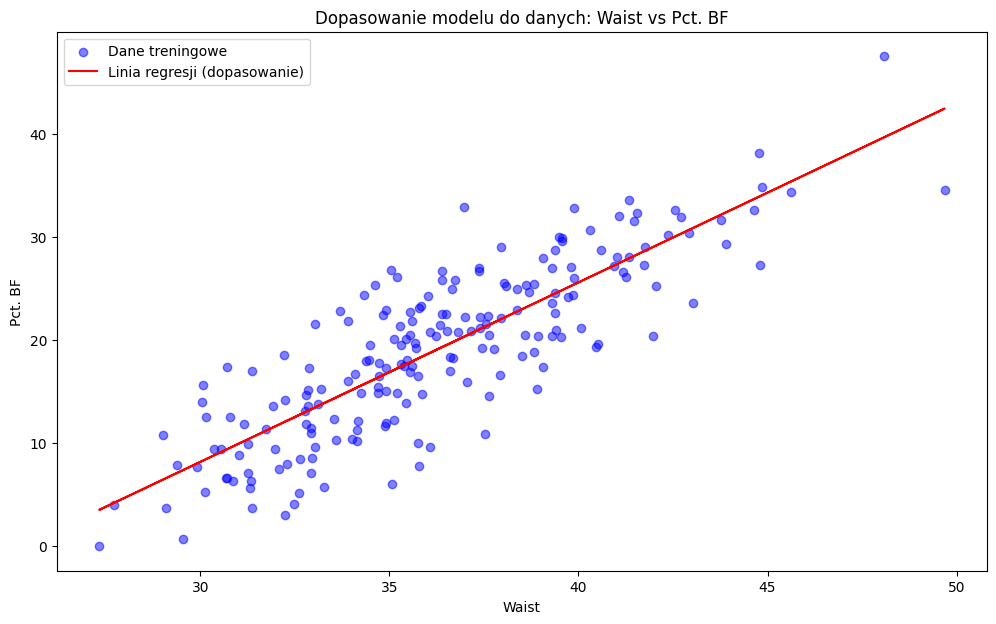

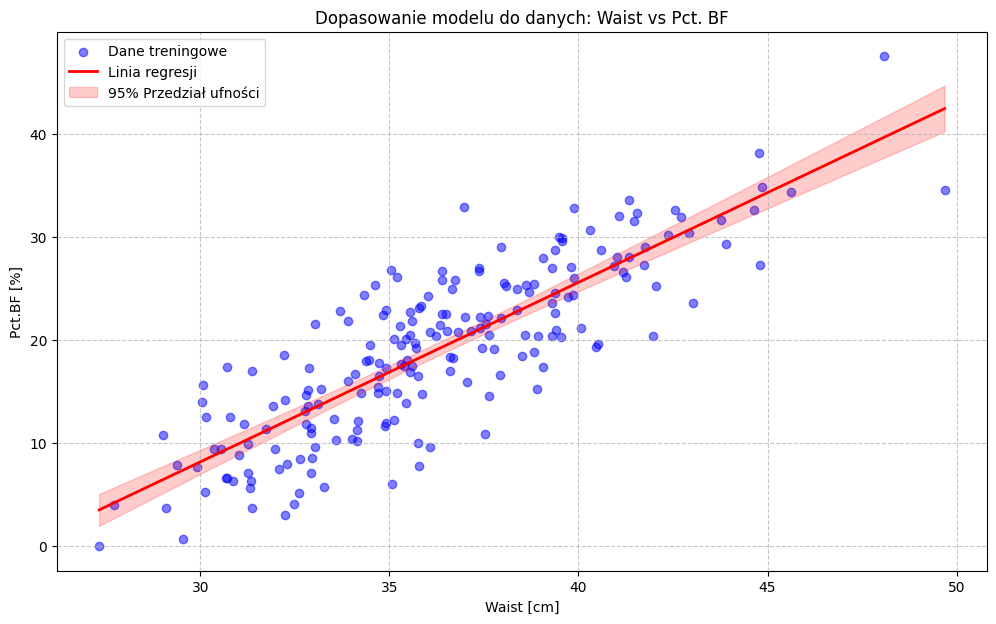

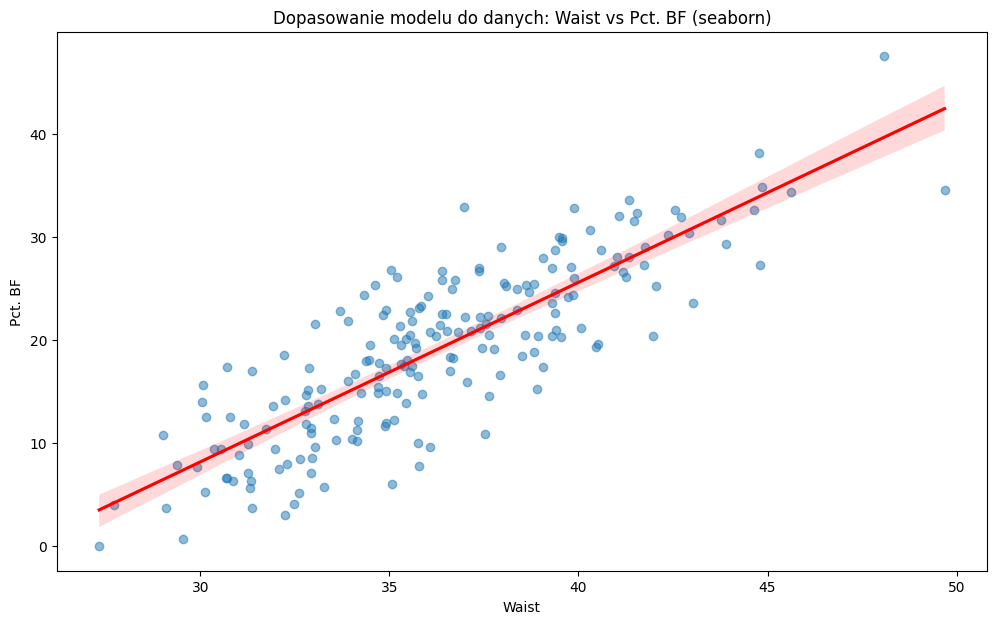

In [73]:
X = body_fat_df['Waist']
y = body_fat_df['Pct.BF']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train, X_test = sm.add_constant(X_train), sm.add_constant(X_test)

model = sm.OLS(y_train, X_train).fit()
print(model.summary())

y_pred = model.predict(X_test)

me = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)

print(f"ME: {me}")
print(f"MAE: {mae}")
print(f"RMSE: {rmse}")

plt.figure(figsize=(12, 7))
plt.scatter(X_train['Waist'], y_train, alpha=0.5, label='Dane treningowe', color='blue')
plt.plot(X_train['Waist'], model.predict(X_train), color='red', label='Linia regresji (dopasowanie)')
plt.title('Dopasowanie modelu do danych: Waist vs Pct. BF')
plt.xlabel('Waist')
plt.ylabel('Pct. BF')
plt.legend()
plt.show()


X_train_sorted = X_train.sort_values(by='Waist')
prediction_results = model.get_prediction(X_train_sorted)
summary_frame = prediction_results.summary_frame(alpha=0.05) # 95%

plt.figure(figsize=(12, 7))
plt.scatter(X_train['Waist'], y_train, color='blue', alpha=0.5, label='Dane treningowe')
plt.plot(X_train_sorted['Waist'], summary_frame['mean'], color='red', linewidth=2, label='Linia regresji')
plt.fill_between(X_train_sorted['Waist'],
                 summary_frame['mean_ci_lower'],
                 summary_frame['mean_ci_upper'],
                 color='red', alpha=0.2, label='95% Przedział ufności')

plt.title('Dopasowanie modelu do danych: Waist vs Pct. BF')
plt.xlabel('Waist [cm]')
plt.ylabel('Pct.BF [%]')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

plt.figure(figsize=(12, 7))
sns.regplot(x=X_train['Waist'], y=y_train, scatter_kws={'alpha': 0.5, }, line_kws={'color': 'red'})
plt.title('Dopasowanie modelu do danych: Waist vs Pct. BF (seaborn)')
plt.xlabel('Waist')
plt.ylabel('Pct. BF')
plt.show()


**Obserwacje:** Wartość R^2 pokazuje, że model oparty o 'Waist' dopasuje się trochę lepiej niż model oparty wyłącznie na 'Abdomen'. Należy jednak zuważyć większe wartości błędów ME, MAE, RMSE, co wskazuje na nieco gorszą zdolność predykcyjną tego modelu. W związku z tym, uznano że lepszym modelem do predykcji jest model z 'Abdomen'.

**Wykres dopasowania modelu do danych treningowych** *wskazuje silną, dodatnią korelację liniową między obwodem talii a procentem tkanki tłuszczowej. Rozrzut niektórych wartości rzeczywistych poza przedział ufności może świadczyć o tym, że istnieją inne czynniki, nie tylko Waist, któe wpływają na poziom tkanki tłuszczowej.*

**Tabela rzeczywista vs predykcja**

In [74]:
from tabulate import tabulate
import scipy.stats as stats

print(tabulate(zip(X_test['Waist'], y_test, y_pred), headers=['Waist', 'Obserwacja Pct. BF', 'Prognoza Pct. BF']))
prediction_obj = model.get_prediction(X_test)
summary_table = prediction_obj.summary_frame(alpha=0.05)

df = model.df_resid  # stopnie swobody
t_crit = stats.t.ppf(1 - 0.05/2, df)

results_df = pd.DataFrame({
    'Waist': X_test['Waist'],
    'Obserwacja Pct. BF': y_test,
    'Prognoza Pct. BF': summary_table['mean'].values,
    'Bład standardowy': summary_table['mean_se'].values,
    'Przedział 95% (dolny)': summary_table['obs_ci_lower'].values, # przedzial predykcji
    'Przedział 95% (górny)': summary_table['obs_ci_upper'].values # przedzial predykcji
})

results_df.reset_index(inplace=True, drop=True)

print(f"\n\nWartość t-Studenta dla 95% przedziału: {t_crit:.3f}")
results_df

  Waist    Obserwacja Pct. BF    Prognoza Pct. BF
-------  --------------------  ------------------
38.0709                  16.1            22.2199
30.5512                   3.9             9.1375
31.4961                  17.7            10.7814
32.0866                  13.9            11.8088
34.0157                  10.6            15.165
33.8583                   8.3            14.891
38.8976                  28.4            23.6583
33.3071                  12.9            13.9321
37.2835                  29.8            20.8501
44.5276                  40.1            33.453
38.4252                  18.7            22.8364
45.5118                  32.3            35.1654
32.874                    8.8            13.1787
36.1417                  12.4            18.8637
39.5669                  16.5            24.8227
34.0945                  13.8            15.302
33.8583                  22              14.891
36.2598                  13              19.0692
32.5984                

,Waist,Obserwacja Pct. BF,Prognoza Pct. BF,Bład standardowy,Przedział 95% (dolny),Przedział 95% (górny)
0,38.070866,16.1,22.219944,0.351309,13.296264,31.143624
1,30.551181,3.9,9.137503,0.556839,0.173245,18.101762
2,31.496063,17.7,10.781370,0.496584,1.830890,19.731850
3,32.086614,13.9,11.808787,0.461266,2.865659,20.751914
4,34.015748,10.6,15.165015,0.365471,6.239123,24.090907
5,33.858268,8.3,14.891038,0.371802,5.964129,23.817947
6,38.897638,28.4,23.658328,0.383862,14.729435,32.587222
7,33.307087,12.9,13.932116,0.396346,5.001102,22.863130
8,37.283465,29.8,20.850056,0.329870,11.929558,29.770554
9,44.527559,40.1,33.453035,0.737888,24.438074,42.467995


**Obserwacje:** Model całkiem dobrze dopasowuje się do danych treningowych (R^2). Obliczone ME, MAE, RMSE sugerują, że zdolność modelu do predykcji opartego na tej jednej zmiennej jest dobra. Jeśli chodzi o prognozę, analiza i zestawienie danych rzeczywistych z prognozami sugeruje, że uwzględnienie tylko jednej zmiennej objaśniającej może być niewystarczające. Mimo poprawnej weryfikacji statystycznej modelu prostego oraz tego, że dane testowe mieszczą się w przedziale predykcji, w większości, analiza przedziałów predykcji wykazała jego istotne ograniczenia. Dla obserwacji o niskich wartościach obwodu talii, dolna granica przedziału predykcji przyjmuje wartości ujemne, co jest biologicznie niemożliwe, warto zauważyć też relatywnie szeroki przedział dla poszczególnych rekordów co w praktyce może nie mieć żadnej wartości biznesowej. Świadczy to o tym, że pojedyncza zmienna objaśniająca może nie być wystarczająca do precyzyjnego opisania tak złożonego parametru, jakim jest zawartość tkanki tłuszczowej.

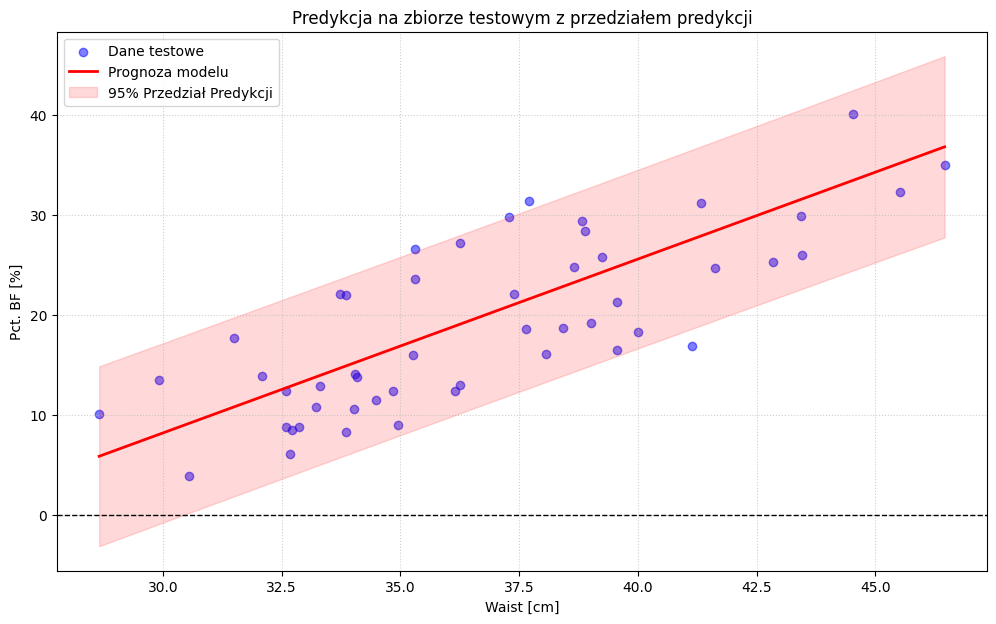

In [75]:
plot_df = results_df.sort_values('Waist')

plt.figure(figsize=(12, 7))
plt.scatter(results_df['Waist'], results_df['Obserwacja Pct. BF'],
            color='blue', alpha=0.5, label='Dane testowe')
plt.plot(plot_df['Waist'], plot_df['Prognoza Pct. BF'],
         color='red', lw=2, label='Prognoza modelu')
plt.fill_between(plot_df['Waist'],
                 plot_df['Przedział 95% (dolny)'],
                 plot_df['Przedział 95% (górny)'],
                 color='red', alpha=0.15, label='95% Przedział Predykcji')

plt.axhline(0, color='black', linewidth=1, linestyle='--')
plt.title('Predykcja na zbiorze testowym z przedziałem predykcji')
plt.xlabel('Waist [cm]')
plt.ylabel('Pct. BF [%]')
plt.legend()
plt.grid(True, linestyle=':', alpha=0.6)
plt.show()

# Model z Density vs BF ???? - wykluczyc, bo bodyfat sie liczy ze wzoru, ktory uwzglednia Density ? ??? i wsm data leakage ??

In [76]:
X = body_fat_df['Density']
y = body_fat_df['Pct.BF']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train, X_test = sm.add_constant(X_train), sm.add_constant(X_test)

model = sm.OLS(y_train, X_train).fit()
print(model.summary())

y_pred = model.predict(X_test)

me = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)

print(f"ME: {me}")
print(f"MAE: {mae}")
print(f"RMSE: {rmse}")


                            OLS Regression Results                            
Dep. Variable:                 Pct.BF   R-squared:                       0.991
Model:                            OLS   Adj. R-squared:                  0.991
Method:                 Least Squares   F-statistic:                 2.123e+04
Date:                Sat, 20 Dec 2025   Prob (F-statistic):          2.23e-203
Time:                        20:41:42   Log-Likelihood:                -235.44
No. Observations:                 200   AIC:                             474.9
Df Residuals:                     198   BIC:                             481.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        485.7652      3.203    151.671      0.0

**Obserwacje:**

# Procedura eliminacji zmiennych wraz z uzasadnieniem
**Backward Feature Elimination** - jedna z najpopularniejszych metod eliminacji zmiennych, wybrałem ją ze względu na "prostotę". Zaczynamy od wszystkich zmiennych i budujemy nasz model. Następnie usuwamy z listy cech zmienną, która daje najlepszą wartość miary oceny. Proces ten jest kontynuowany aż do osiągnięcia zadanego kryterium. W każdym kroku usuwamy zmienną o najwyższej wartości p (p-value przekraczającej poziom istotności alfa = 0.05, tak przyjąłem) aż do momentu, gdy w modelu pozostaną wyłącznie zmienne istotne statystycznie. Równiedobrze można zrobić to samo, ale dla statystyki t-studenta i usuwać zmienną o najmniejszej wartości statystyki t-studenta.

**pogrubiony tekst - jeśli starczy czasu**

In [98]:
from sklearn.feature_selection import SequentialFeatureSelector

In [99]:
X = body_fat_df.drop(['Pct.BF'], axis=1)
y = body_fat_df['Pct.BF']
# X.head()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
# y.head()
len(X_train)

200

In [100]:
X_train, X_test = sm.add_constant(X_train), sm.add_constant(X_test)

model = sm.OLS(y_train, X_train).fit()
print(model.summary())

y_pred = model.predict(X_test)
df = model.df_resid  # stopnie swobody n - k - 1 (liczność zbioru - liczba zmiennych objaśniających - 1)
t_crit = stats.t.ppf(1 - 0.05/2, df) # 1,97 +- odczyt z tablic

me = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)

print(f"ME: {me}")
print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
df, t_crit

                            OLS Regression Results                            
Dep. Variable:                 Pct.BF   R-squared:                       0.976
Model:                            OLS   Adj. R-squared:                  0.975
Method:                 Least Squares   F-statistic:                     508.8
Date:                Sat, 20 Dec 2025   Prob (F-statistic):          5.59e-141
Time:                        20:55:26   Log-Likelihood:                -339.35
No. Observations:                 200   AIC:                             710.7
Df Residuals:                     184   BIC:                             763.5
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        439.2261     14.023     31.322      0.0

(np.float64(184.0), np.float64(1.9729405423858688))

***Zaczynam eliminację!!!***

In [101]:
features = list(X_train.columns)
alpha = 0.05
step = 1

print(f"{'Krok':<6} | {'Usuwana zmienna':<15} | {'Statystyka |t|':<15} | {'Wartość krytyczna'}")
print("-" * 60)

while True:
    X_subset = sm.add_constant(X_train[features])
    model = sm.OLS(y_train, X_subset).fit()

    # t-krytyczne dla aktualnych stopni swobody
    df = model.df_resid
    t_crit = stats.t.ppf(1 - alpha/2, df)

    t_values = model.tvalues.drop('const')

    # zmienna z najmniejszym |t|
    min_t_var = t_values.abs().idxmin()
    min_t_val = t_values.abs().min()

    # stop?
    if min_t_val < t_crit:
        print(f"{step:<6} | {min_t_var:<15} | {min_t_val:<15.4f} | {t_crit:.4f}")
        features.remove(min_t_var)
        step += 1
    else:
        print("-" * 60)
        print(f"KONIEC |t| > {t_crit:.4f}")
        break

final_model = sm.OLS(y_train, sm.add_constant(X_train[features])).fit()
print("\n=== MODEL PO ELIMINACJI ===")
print(final_model.summary())

print("PREDYKCJA")
y_pred = final_model.predict(X_test[features])
me = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)

print(f"ME: {me}")
print(f"MAE: {mae}")
print(f"RMSE: {rmse}")


Krok   | Usuwana zmienna | Statystyka |t|  | Wartość krytyczna
------------------------------------------------------------
1      | Wrist           | 0.0317          | 1.9729
2      | Waist           | 0.1692          | 1.9729
3      | Neck            | 0.1613          | 1.9728
4      | Height          | 0.3393          | 1.9727
5      | Forearm         | 0.2869          | 1.9727
6      | Thigh           | 0.3119          | 1.9726
7      | Hip             | 0.4259          | 1.9725
8      | Knee            | 0.7031          | 1.9725
9      | Chest           | 0.9349          | 1.9724
10     | Ankle           | 1.1535          | 1.9723
11     | Bicep           | 1.1641          | 1.9723
12     | Weight          | 0.7243          | 1.9722
13     | Age             | 1.5979          | 1.9721
------------------------------------------------------------
KONIEC |t| > 1.9721

=== MODEL PO ELIMINACJI ===
                            OLS Regression Results                            
Dep. Variab

**Obserwacje:** Jak widać, po eliminacji zmiennych metodą statystyki |t|, zostały nam zmienne Density i Abdomen,  czego można było się spodziewać po naszych wcześniejszych modelach i obserwacjach. Wartość R^2 wskazuje na dobre dopasowanie modelu do danych treningowych. Błedy ME, MAE, RMSE sugerują także dobrą zdolność tego modelu do predykcji ze względu na swoje relatywnie niskie wartości. Wartości te uległy znaczącej redukcji w porównaniu do wcześniejszych prostych modeli opartych na pojedyńczych zmiennych Abdomen czy Waist. Zmienna Density wskazuje na bardzo silny, ujemny wpływ na poziom tkanki tłuszczowej, co zgadza się z wiedzą medyczną aktualną, tj. im wyższa gęstość ciała, tym niższa zawartość tkanki tłuszczowej. Mimo wysokiego wskaźnika uwarunkowania sugerującego współliniowość, obie zmienne są istotne statystycznie ze względu na swoje wartości p-value.

https://www.topendsports.com/testing/siri-equation.htm

In [104]:
# print(tabulate(zip(X_test[features], y_test, y_pred), headers=['Density', 'Abdomen', 'Obserwacja Pct. BF', 'Prognoza Pct. BF']))
prediction_obj = model.get_prediction(X_test[features])
summary_table = prediction_obj.summary_frame(alpha=0.05)

df = model.df_resid  # stopnie swobody
t_crit = stats.t.ppf(1 - 0.05/2, df)

results_df = pd.DataFrame({
    'Density': X_test['Density'],
    'Abdomen': X_test['Abdomen'],
    'Obserwacja Pct. BF': y_test,
    'Prognoza Pct. BF': summary_table['mean'].values,
    'Bład standardowy': summary_table['mean_se'].values,
    'Przedział 95% (dolny)': summary_table['obs_ci_lower'].values, # przedzial predykcji
    'Przedział 95% (górny)': summary_table['obs_ci_upper'].values # przedzial predykcji
})

results_df.reset_index(inplace=True, drop=True)

print(f"\n\nWartość t-Studenta dla 95% przedziału: {t_crit:.3f}")
results_df



Wartość t-Studenta dla 95% przedziału: 1.972


,Density,Abdomen,Obserwacja Pct. BF,Prognoza Pct. BF,Bład standardowy,Przedział 95% (dolny),Przedział 95% (górny)
0,1.0488,86.0,22.0,21.321940,0.185987,18.621342,24.022538
1,1.0378,99.8,27.0,26.790728,0.131164,24.102679,29.478778
2,1.0650,91.1,14.8,15.288921,0.115063,12.603740,17.974101
3,1.0673,86.6,13.8,14.017101,0.111297,11.332538,16.701663
4,1.0648,88.1,14.9,15.129927,0.105264,12.446311,17.813543
5,1.0771,83.9,9.6,9.907612,0.141762,7.217471,12.597753
6,1.0480,95.5,22.3,22.395076,0.103744,19.711690,25.078462
7,1.0636,88.1,15.4,15.606848,0.103778,12.923457,18.290239
8,1.0543,89.7,19.5,19.430177,0.110799,16.745695,22.114660
9,1.0398,89.4,26.1,25.169127,0.206611,22.462705,27.875549


**Obserwacje:** Model bardzo dobrze dopasowuje się do danych treningowych (R^2). Obliczone ME, MAE, RMSE sugerują, że zdolność modelu do predykcji opartego na tych 2 zmiennych jest bardzo dobra. Jeśli chodzi o prognozę, analiza i zestawienie danych rzeczywistych z przewidywaniami sugeruje, że uwzględnienie właśnie tych dwóch zmiennych poprawia znacznie predykcje poziomu tkanki tłuszczowej. Wartości przedziałów predykcji również uległy znacznej poprawie oraz wartości prognozy są bardzo zbliżone do wartości rzeczywistych, co również pokazuje że ten model jest lepszy od wcześniejszych, z którymi eksperymentowaliśmy.

# Model dla przewidywania wagi

# Model dla BMI